In [1]:
# display graph on notebook
%matplotlib inline
import matplotlib.pyplot as plt
import array
import math
import numpy as np
import pandas as pd
import random
import time

In [41]:
LENGTH = int(1e8)
l = list(range(int(LENGTH)))
a = array.array('i', l)
na = np.array(a)

In [47]:
NUM_SPLIT = 10
RANGE_SIZE = int(LENGTH / NUM_SPLIT)
start_end = [(i*RANGE_SIZE, (i+1)*RANGE_SIZE-1) for i in range(0, NUM_SPLIT)]

t_list = []
t_array = []
t_ndarray = []

for s, e in start_end:
    start = time.time()
    for i in range(s, e):
        value = l[i]
    end = time.time()
    t_list.append(round((end-start)*1e9/RANGE_SIZE, 4))
    
    start = time.time()
    for i in range(s, e):
        value = a[i]
    end = time.time()
    t_array.append(round((end-start)*1e9/RANGE_SIZE, 4))
    
    start = time.time()
    for i in range(s, e):
        value = na[i]
    end = time.time()
    t_ndarray.append(round((end-start)*1e9/RANGE_SIZE, 4))

pd.DataFrame(
    data=np.array([start_end, t_list, t_array, t_ndarray]).T,
    columns=['index (from, to)', 'time ave. (list) [ns]', 'time ave. (array) [ns]', 'time ave. (ndarray) [ns]']
)

,"index (from, to)",time ave. (list) [ns],time ave. (array) [ns],time ave. (ndarray) [ns]
0,"(0, 9999999)",252.514,316.216,578.332
1,"(10000000, 19999999)",290.781,289.987,569.818
2,"(20000000, 29999999)",265.837,292.994,565.853
3,"(30000000, 39999999)",263.495,292.492,566.21
4,"(40000000, 49999999)",261.697,310.267,575.604
5,"(50000000, 59999999)",279.848,303.713,588.929
6,"(60000000, 69999999)",261.411,296.507,568.853
7,"(70000000, 79999999)",264.643,309.365,568.123
8,"(80000000, 89999999)",265.812,292.689,561.328
9,"(90000000, 99999999)",292.737,326.703,627.309


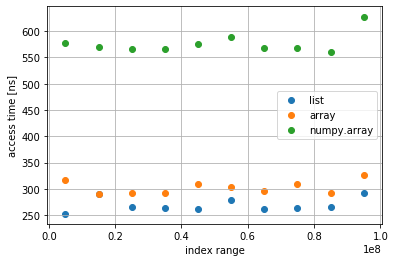

In [48]:
x = [(s+e)/2. for s, e in start_end]
plt.xlabel('index range')
plt.ylabel('access time [ns]')
plt.scatter(x, t_list, label='list')
plt.scatter(x, t_array, label='array')
plt.scatter(x, t_ndarray, label='numpy.array')
plt.grid()
plt.legend()
plt.show()